# Variance-Bias exercise

In [2]:
from sklearn import datasets
import numpy as np
from matplotlib import pyplot as plt

## Task 1

Demonstrate the variance-bias tradeoff using different models to describe data with true pdf

$$p(x) = 1+\frac15 x^2 \qquad \mbox{for}\qquad 0\leq x\leq 1\;, \quad 0 \; \mbox{otherwise}$$

by reproducing the plots in the lecture:



Use the models 

$$ m_1(x) = a +bx$$

![](biasVariance.png)

and

$$m_2(x)= a+bx +cx^2 +dx^3.$$
![](biasVariance-m3.png)


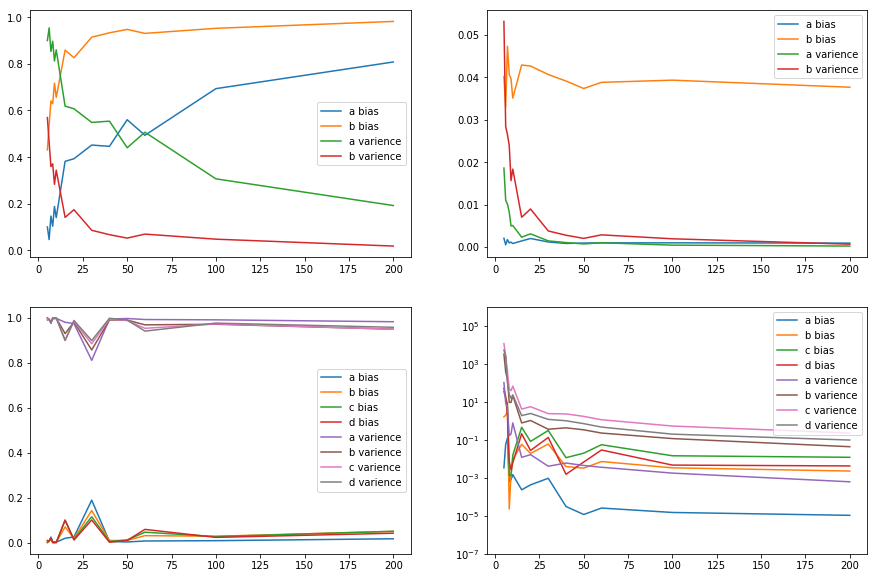

In [4]:
from scipy.optimize import curve_fit

experimentTimes = 50
def fn(x):
    return 1 + 0.2 * x ** 2

def f_1(x, w1, w2):
    return w1 + w2*x

def f_2(x, a, b, c, d):
    return a + b*x + c*x**2 + d*x**3

interceptMeanBias = []
interceptVarience = []
coefMeanBias = []
coefVarience = []
relativeVarianceCoef = []
relativeVarianceIntercept = []
relativeBiasCoef = []
relativeBiasIntercept = []

dataSampleSizes = [5,6,7,8,9,10,15,20,30,40,50,60,100,200]

for dataSampleSize in dataSampleSizes:
    interceptTemp = []
    coefTemp = []
    for i in range(experimentTimes):
        rxs = np.random.random(dataSampleSize)
        noise = np.random.normal( size = (dataSampleSize) ) / 10
        X1D = np.array(rxs)
        ys1D = fn(rxs) + noise
        popt, pcov = curve_fit(f_1, X1D, ys1D)
        interceptTemp.append(popt[0])
        coefTemp.append(popt[1])
    coefBias = (np.mean(coefTemp) - 0) ** 2
    coefVar = np.var(coefTemp)
    interceptBias = (np.mean(interceptTemp) - 1) ** 2
    interceptVar = np.var(interceptTemp)
    interceptMeanBias.append((1 - np.mean(interceptTemp)) ** 2)
    interceptVarience.append(np.var(interceptTemp))
    coefMeanBias.append((0 - np.mean(coefTemp)) ** 2)
    coefVarience.append(np.var(coefTemp))
    relativeVarianceCoef.append(coefVar/(coefVar+coefBias)) 
    relativeVarianceIntercept.append(interceptVar/(interceptVar+interceptBias))
    relativeBiasCoef.append(coefBias/(coefVar+coefBias))
    relativeBiasIntercept.append(interceptBias/(interceptVar+interceptBias))

fig = plt.figure(figsize=(15,10))
plt.subplot(221)
plt.plot(dataSampleSizes,relativeBiasIntercept,label = 'a bias')
plt.plot(dataSampleSizes,relativeBiasCoef,label = 'b bias')
plt.plot(dataSampleSizes,relativeVarianceIntercept,label = 'a varience')
plt.plot(dataSampleSizes,relativeVarianceCoef,label = 'b varience')
plt.legend()
plt.subplot(222)
plt.plot(dataSampleSizes,interceptMeanBias,label = 'a bias')
plt.plot(dataSampleSizes,coefMeanBias,label = 'b bias')
plt.plot(dataSampleSizes,interceptVarience,label = 'a varience')
plt.plot(dataSampleSizes,coefVarience,label = 'b varience')
plt.legend()



aMeanBias = []
aInterceptVarience = []
bMeanBias = []
bInterceptVarience = []
cMeanBias = []
cInterceptVarience = []
dMeanBias = []
dInterceptVarience = []

aRelativeVariance = []
aRelativeBias = []
bRelativeVariance = []
bRelativeBias = []
cRelativeVariance = []
cRelativeBias = []
dRelativeVariance = []
dRelativeBias = []

for dataSampleSize in dataSampleSizes:
    aTemp = []
    bTemp = []
    cTemp = []
    dTemp = []
    for i in range(experimentTimes):
        rxs = np.random.random(dataSampleSize)
        noise = np.random.normal( size = (dataSampleSize) ) / 10
        X1D = np.array(rxs)
        ys1D = fn(rxs) + noise
        popt, pcov = curve_fit(f_2, X1D, ys1D)
        aTemp.append(popt[0])
        bTemp.append(popt[1])
        cTemp.append(popt[2])
        dTemp.append(popt[3])
        
    aBias = (np.mean(aTemp) - 1) ** 2
    aVar = np.var(aTemp)
    bBias = (np.mean(bTemp) - 0) ** 2
    bVar = np.var(bTemp)
    cBias = (np.mean(cTemp) - 0.2) ** 2
    cVar = np.var(cTemp)
    dBias = (np.mean(dTemp) - 0) ** 2
    dVar = np.var(dTemp)
    
    aMeanBias.append(aBias)
    aInterceptVarience.append(aVar)
    bMeanBias.append(bBias)
    bInterceptVarience.append(bVar)
    cMeanBias.append(cBias)
    cInterceptVarience.append(cVar)
    dMeanBias.append(dBias)
    dInterceptVarience.append(dVar)
    
    aRelativeVariance.append(aVar/(aVar+aBias)) 
    aRelativeBias.append(aBias/(aVar+aBias)) 
    bRelativeVariance.append(bVar/(bVar+bBias)) 
    bRelativeBias.append(bBias/(bVar+bBias)) 
    cRelativeVariance.append(cVar/(cVar+cBias)) 
    cRelativeBias.append(cBias/(cVar+cBias)) 
    dRelativeVariance.append(dVar/(dVar+dBias)) 
    dRelativeBias.append(dBias/(dVar+dBias)) 
    
plt.subplot(223)
plt.plot(dataSampleSizes,aRelativeBias,label = 'a bias')
plt.plot(dataSampleSizes,bRelativeBias,label = 'b bias')
plt.plot(dataSampleSizes,cRelativeBias,label = 'c bias')
plt.plot(dataSampleSizes,dRelativeBias,label = 'd bias')
plt.plot(dataSampleSizes,aRelativeVariance,label = 'a varience')
plt.plot(dataSampleSizes,bRelativeVariance,label = 'b varience')
plt.plot(dataSampleSizes,cRelativeVariance,label = 'c varience')
plt.plot(dataSampleSizes,dRelativeVariance,label = 'd varience')
plt.legend()

ax = fig.add_subplot(2, 2, 4)
ax.set_ylim(10**(-7), 10**6)
ax.set_yscale('log')
ax.plot(dataSampleSizes,aMeanBias,label = 'a bias')
ax.plot(dataSampleSizes,bMeanBias,label = 'b bias')
ax.plot(dataSampleSizes,cMeanBias,label = 'c bias')
ax.plot(dataSampleSizes,dMeanBias,label = 'd bias')
ax.plot(dataSampleSizes,aInterceptVarience,label = 'a varience')
ax.plot(dataSampleSizes,bInterceptVarience,label = 'b varience')
ax.plot(dataSampleSizes,cInterceptVarience,label = 'c varience')
ax.plot(dataSampleSizes,dInterceptVarience,label = 'd varience')


ax.legend()
 
# variance_a =[]
# variance_b =[]
# bias_a= []
# bias_b = []
# for time,n_train in enumerate(dataSampleSizes):
#     a = [];b = []
#     for i in range(experimentTimes):
#         rxs = np.random.random(n_train)
#         noise = np.random.normal( size = (n_train) )
#         ys1D = fn(rxs)
# #         print(X1D,ys1D)
#         coef,pov =  curve_fit(f_1,rxs,ys1D)
#         a.append(coef[0])
#         b.append(coef[1])
#     variance_a.append(np.var(a))
#     variance_b.append(np.var(b))
#     bias_a.append((np.mean(a)-1)**2)
#     bias_b.append((np.mean(b)-0)**2)
# print(bias_a)

## Bonus task

Perform a variance-bias analysis of last week's ridge regression model for a fixed number of data example and varying $\alpha$. Think about what plot you want to show and try to predict how it is going to look before drawing it.

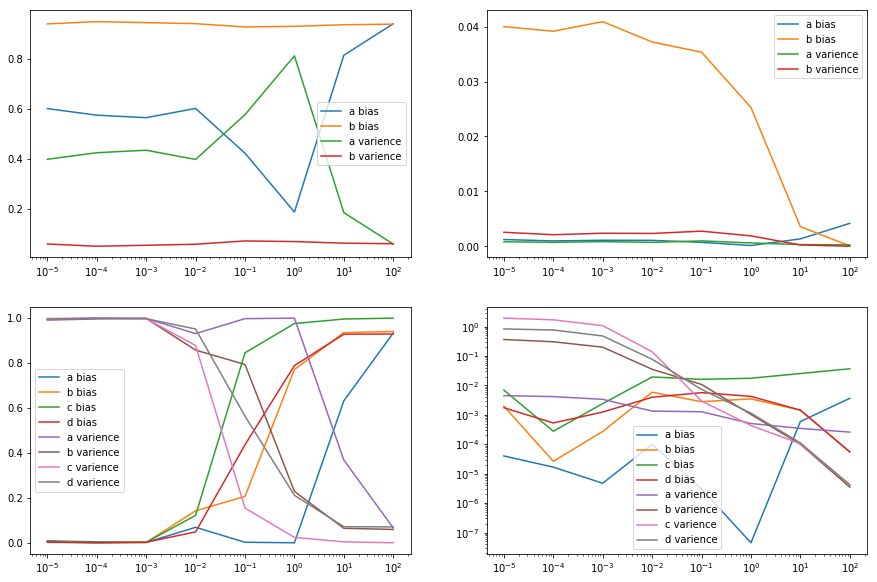

In [14]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


interceptMeanBias = []
interceptVarience = []
coefMeanBias = []
coefVarience = []
relativeVarianceCoef = []
relativeVarianceIntercept = []
relativeBiasCoef = []
relativeBiasIntercept = []

aMeanBias = []
aInterceptVarience = []
bMeanBias = []
bInterceptVarience = []
cMeanBias = []
cInterceptVarience = []
dMeanBias = []
dInterceptVarience = []

aRelativeVariance = []
aRelativeBias = []
bRelativeVariance = []
bRelativeBias = []
cRelativeVariance = []
cRelativeBias = []
dRelativeVariance = []
dRelativeBias = []

poly3 = PolynomialFeatures(3)

dataSampleSize = 50
experimentTimes = 100
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
for al in alphas:
    interceptTemp = []
    coefTemp = []
    aTemp = []
    bTemp = []
    cTemp = []
    dTemp = []
    for i in range(experimentTimes):
        rxs = np.random.random(dataSampleSize)
        noise = np.random.normal( size = (dataSampleSize) ) / 10
        X1D = np.array([rxs]).T
        ys1D = fn(rxs) + noise
        X3D = poly3.fit_transform(X1D)
        X3D = X3D[:, 1:]
        rd = Ridge(alpha = al)
        rd.fit(X1D, ys1D)
        interceptTemp.append(rd.intercept_)
        coefTemp.append(rd.coef_[0])
        
        rd.fit(X3D, ys1D)
        aTemp.append(rd.intercept_)
        bTemp.append(rd.coef_[0])
        cTemp.append(rd.coef_[1])
        dTemp.append(rd.coef_[2])
        
    coefBias = (np.mean(coefTemp) - 0) ** 2
    coefVar = np.var(coefTemp)
    interceptBias = (np.mean(interceptTemp) - 1) ** 2
    interceptVar = np.var(interceptTemp)
    interceptMeanBias.append(interceptBias)
    interceptVarience.append(interceptVar)
    coefMeanBias.append(coefBias)
    coefVarience.append(coefVar)
    relativeVarianceCoef.append(coefVar/(coefVar+coefBias)) 
    relativeVarianceIntercept.append(interceptVar/(interceptVar+interceptBias))
    relativeBiasCoef.append(coefBias/(coefVar+coefBias))
    relativeBiasIntercept.append(interceptBias/(interceptVar+interceptBias))
    
    aBias = (np.mean(aTemp) - 1) ** 2
    aVar = np.var(aTemp)
    bBias = (np.mean(bTemp) - 0) ** 2
    bVar = np.var(bTemp)
    cBias = (np.mean(cTemp) - 0.2) ** 2
    cVar = np.var(cTemp)
    dBias = (np.mean(dTemp) - 0) ** 2
    dVar = np.var(dTemp)
    
    aMeanBias.append(aBias)
    aInterceptVarience.append(aVar)
    bMeanBias.append(bBias)
    bInterceptVarience.append(bVar)
    cMeanBias.append(cBias)
    cInterceptVarience.append(cVar)
    dMeanBias.append(dBias)
    dInterceptVarience.append(dVar)
    
    aRelativeVariance.append(aVar/(aVar+aBias)) 
    aRelativeBias.append(aBias/(aVar+aBias)) 
    bRelativeVariance.append(bVar/(bVar+bBias)) 
    bRelativeBias.append(bBias/(bVar+bBias)) 
    cRelativeVariance.append(cVar/(cVar+cBias)) 
    cRelativeBias.append(cBias/(cVar+cBias)) 
    dRelativeVariance.append(dVar/(dVar+dBias)) 
    dRelativeBias.append(dBias/(dVar+dBias)) 


plt.figure(figsize=(15,10))
plt.subplot(221)
plt.xscale('log')
plt.plot(alphas,relativeBiasIntercept,label = 'a bias')
plt.plot(alphas,relativeBiasCoef,label = 'b bias')
plt.plot(alphas,relativeVarianceIntercept,label = 'a varience')
plt.plot(alphas,relativeVarianceCoef,label = 'b varience')
plt.legend()

plt.subplot(222)
plt.xscale('log')
plt.plot(alphas,interceptMeanBias,label = 'a bias')
plt.plot(alphas,coefMeanBias,label = 'b bias')
plt.plot(alphas,interceptVarience,label = 'a varience')
plt.plot(alphas,coefVarience,label = 'b varience')
plt.legend()

plt.subplot(223)
plt.xscale('log')
plt.plot(alphas,aRelativeBias,label = 'a bias')
plt.plot(alphas,bRelativeBias,label = 'b bias')
plt.plot(alphas,cRelativeBias,label = 'c bias')
plt.plot(alphas,dRelativeBias,label = 'd bias')
plt.plot(alphas,aRelativeVariance,label = 'a varience')
plt.plot(alphas,bRelativeVariance,label = 'b varience')
plt.plot(alphas,cRelativeVariance,label = 'c varience')
plt.plot(alphas,dRelativeVariance,label = 'd varience')
plt.legend()

plt.subplot(224)
plt.xscale('log')
plt.yscale('log')
plt.plot(alphas,aMeanBias,label = 'a bias')
plt.plot(alphas,bMeanBias,label = 'b bias')
plt.plot(alphas,cMeanBias,label = 'c bias')
plt.plot(alphas,dMeanBias,label = 'd bias')
plt.plot(alphas,aInterceptVarience,label = 'a varience')
plt.plot(alphas,bInterceptVarience,label = 'b varience')
plt.plot(alphas,cInterceptVarience,label = 'c varience')
plt.plot(alphas,dInterceptVarience,label = 'd varience')
plt.legend()



    


With the alpha become bigger, the varience become smaller, but the bias have a lowest point maybe when alpha equal to 10^-3